In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time, datetime

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 65)

%matplotlib inline

sp500 = pd.read_csv('Notebooks/Data/sp500.csv', index_col='Symbol', usecols=[0, 2, 3, 7])
sp500_original = pd.read_csv('Notebooks/Data/sp500.csv')

# Считываем исторические данные о котировках акций
omh = pd.read_csv('Notebooks/Data/omh.csv')

### Информация о датасете

#### Размер датасета

In [2]:
sp500_original.shape


(500, 15)

#### Инф. о датасета (типы данных колонок и наличие пропусков)

In [3]:
sp500_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          500 non-null    object 
 1   Name            500 non-null    object 
 2   Sector          500 non-null    object 
 3   Price           500 non-null    float64
 4   Dividend Yield  424 non-null    float64
 5   Price/Earnings  480 non-null    float64
 6   Earnings/Share  499 non-null    float64
 7   Book Value      499 non-null    float64
 8   52 week low     499 non-null    float64
 9   52 week high    499 non-null    float64
 10  Market Cap      496 non-null    float64
 11  EBITDA          499 non-null    float64
 12  Price/Sales     496 non-null    float64
 13  Price/Book      486 non-null    float64
 14  SEC Filings     500 non-null    object 
dtypes: float64(11), object(4)
memory usage: 58.7+ KB


#### Вывод названия колонок

In [4]:
sp500_original.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Dividend Yield',
       'Price/Earnings', 'Earnings/Share', 'Book Value',
       '52 week low', '52 week high', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

#### Основные статистики датасета

In [5]:
sp500_original.describe()

            Price  Dividend Yield  Price/Earnings  \
count   500.00000      424.000000      480.000000   
mean     77.36860        2.131439       29.887792   
std      87.59694        1.321017       70.163577   
min       0.00000        0.040000        2.520000   
25%      38.74500        1.260000       15.570000   
50%      58.35500        1.890000       20.005000   
75%      86.68000        2.820000       26.627500   
max    1197.12000       10.640000     1329.620000   

       Earnings/Share     Book Value  ...  52 week high  \
count      499.000000     499.000000  ...    499.000000   
mean         3.564842     301.611301  ...     84.668283   
std          4.049497    6195.727862  ...     98.995689   
min        -10.693000     -51.275000  ...      6.100000   
25%          1.652000      10.836500  ...     42.500000   
50%          2.841000      19.098000  ...     63.560000   
75%          4.435000      31.386500  ...     91.295000   
max         41.727000  138425.453100  ...   1378.9

#### Инф. по количеству NaN значений в столбцах - df.isna()

In [6]:
sp500_original.isna().sum()

Symbol             0
Name               0
Sector             0
Price              0
Dividend Yield    76
Price/Earnings    20
Earnings/Share     1
Book Value         1
52 week low        1
52 week high       1
Market Cap         4
EBITDA             1
Price/Sales        4
Price/Book        14
SEC Filings        0
dtype: int64

#### Выведем записи в кторых у столбца 'Price/Book' значение равно NaN

In [7]:
sp500_original[sp500_original['Price/Book'].isna()][['Symbol', 'Price', 'Price/Book']]


    Symbol   Price  Price/Book
18    ALLE   52.46         NaN
48     AZO  540.90         NaN
58    BEAM    0.00         NaN
75     CVC   17.45         NaN
137    DTV   83.59         NaN
148    DNB  104.83         NaN
208    GHC  677.29         NaN
263     LB   57.32         NaN
276     LO   60.20         NaN
278    LSI   11.14         NaN
285    MAR   59.26         NaN
358     PM   86.57         NaN
466   VRSN   49.92         NaN
489   WYNN  207.86         NaN

#### Процентное выржение незаполненных данных

In [8]:
sp500_original.isna().sum() / sp500_original.shape[0]

Symbol            0.000
Name              0.000
Sector            0.000
Price             0.000
Dividend Yield    0.152
Price/Earnings    0.040
Earnings/Share    0.002
Book Value        0.002
52 week low       0.002
52 week high      0.002
Market Cap        0.008
EBITDA            0.002
Price/Sales       0.008
Price/Book        0.028
SEC Filings       0.000
dtype: float64

#### Визуализируем соотношение компаний по Sector

<Axes: ylabel='count'>

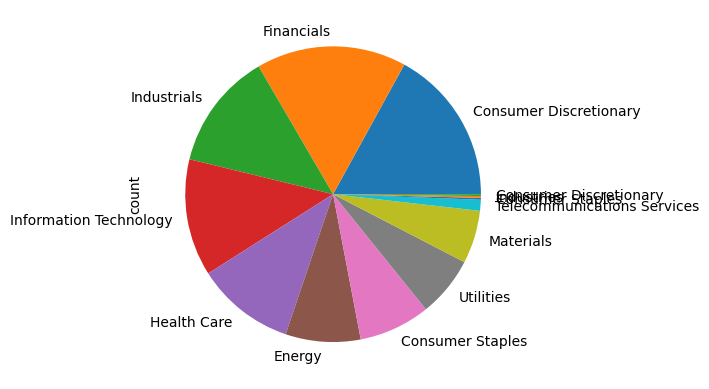

In [9]:
sp500_original['Sector'].value_counts().plot.pie()

<Axes: xlabel='Sector'>

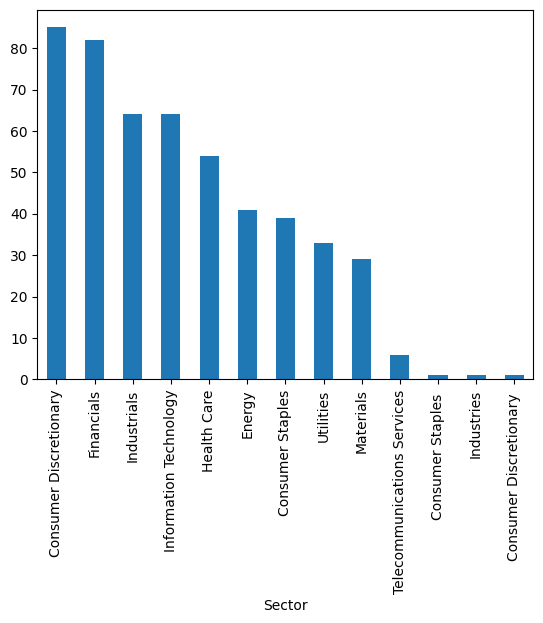

In [10]:
sp500_original['Sector'].value_counts().plot.bar()

In [11]:
sp500_original['Sector'].value_counts(ascending=True)

Sector
Consumer Staples                1
Industries                      1
Consumer Discretionary          1
Telecommunications Services     6
Materials                      29
Utilities                      33
Consumer Staples               39
Energy                         41
Health Care                    54
Industrials                    64
Information Technology         64
Financials                     82
Consumer Discretionary         85
Name: count, dtype: int64

In [12]:
# Создадим датафрейм с 4 столбцами
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(5, 4), columns=['A', 'B', 'C', 'D'])
df

          A         B         C         D
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

In [13]:
# Умножим ВСЕ на 2 (исходный датафрейм НЕ МЕНЯЕТСЯ)
df * 2

          A         B         C         D
0  0.938225 -0.565727 -3.018117 -2.271265
1  2.424224 -0.346429  0.238417 -2.088472
2 -1.723698 -4.209138 -0.989859  2.143608
3  1.443110 -1.413542 -2.079150  0.543720
4 -0.849945  1.134041  0.552464 -2.174801

In [14]:
# Извлекаем первую строку
s = df.iloc[0]

# Вычитаем первую стоку из КАЖДОЙ СТРОКИ объекта датафрейма.
diff = df - s
print(diff, end='\n\n')
print(type(s), end='\n\n')

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1  0.743000  0.109649  1.628267  0.091396
2 -1.330961 -1.821706  1.014129  2.207436
3  0.252443 -0.423908  0.469484  1.407492
4 -0.894085  0.849884  1.785291  0.048232

<class 'pandas.core.series.Series'>



При выполнении арифметической операции между двумя объектами DataFrame
выравнивание происходит как по меткам индекса, так и по меткам столбцов. Следующий программный код извлекает фрагмент df и вычитает его из исходного
датафрейма. В результате видим, что выровненные значения, полученные в результате вычитания, равны 0, а остальные получают значения NaN:


In [15]:
# Извлечем строки с 1 по 3 позицию и только столбцы В и С
subFrame  = df.loc[1:3][['B', 'C']]

# Мы извлеки небольшой квадрат из середины df
subFrame, subFrame.index

(          B         C
 1 -0.173215  0.119209
 2 -2.104569 -0.494929
 3 -0.706771 -1.039575,
 RangeIndex(start=1, stop=4, step=1))

In [16]:
# Демонстрируем, как происходит выравнивание при выполнении операции вычитания.
df, df - subFrame

(          A         B         C         D
 0  0.469112 -0.282863 -1.509059 -1.135632
 1  1.212112 -0.173215  0.119209 -1.044236
 2 -0.861849 -2.104569 -0.494929  1.071804
 3  0.721555 -0.706771 -1.039575  0.271860
 4 -0.424972  0.567020  0.276232 -1.087401,
     A    B    C   D
 0 NaN  NaN  NaN NaN
 1 NaN  0.0  0.0 NaN
 2 NaN  0.0  0.0 NaN
 3 NaN  0.0  0.0 NaN
 4 NaN  NaN  NaN NaN)

In [17]:
# Методы арифметических операций позволяют задать ось
# Извлекаем столбец A
a_col = df['A']
a_row = df.loc[1]
print(df, end='\n\n')

# Вычтем столбец А ИЗ КАЖДОГО СТОЛБЦА датафрейма
print(df.sub(a_col, axis='index')) # axis = 0
print(df.sub(a_row, axis='columns')) # axis = 1


          A         B         C         D
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

     A         B         C         D
0  0.0 -0.751976 -1.978171 -1.604745
1  0.0 -1.385327 -1.092903 -2.256348
2  0.0 -1.242720  0.366920  1.933653
3  0.0 -1.428326 -1.761130 -0.449695
4  0.0  0.991993  0.701204 -0.662428
          A         B         C         D
0 -0.743000 -0.109649 -1.628267 -0.091396
1  0.000000  0.000000  0.000000  0.000000
2 -2.073961 -1.931355 -0.614138  2.116040
3 -0.490557 -0.533556 -1.158784  1.316096
4 -1.637084  0.740235  0.157023 -0.043165


#### Вычисление количества значений отличных от NaN.

In [18]:
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.count()

4

#### Определение уникальных значений

In [19]:
s.unique()

array(['a', 'b', 'c', nan], dtype=object)

#### Количество уникальнхх значений (исключая значение NaN)

In [20]:
s.nunique()

3

#### Вычисляем встречаемость каждого уникального значения для нечисловых данных.

In [21]:
s.value_counts(dropna=False)

a      2
b      1
c      1
NaN    1
Name: count, dtype: int64

#### Вычисление минимума и максимума

In [59]:
# Определим минимальную  и максимальную цену для обеих акций
omh[['MSFT', 'AAPL']].min(), '------', omh[['MSFT', 'AAPL']].max()

(MSFT     45.16
 AAPL    106.75
 dtype: float64,
 '------',
 MSFT     48.84
 AAPL    115.93
 dtype: float64)

#### Можно получить ИНДЕКСЫ минимального и максимального значения

In [23]:
omh[['MSFT', 'AAPL']].idxmin(), '------', omh[['MSFT', 'AAPL']].idxmax()

(MSFT    11
 AAPL    11
 dtype: int64,
 '------',
 MSFT    3
 AAPL    2
 dtype: int64)

#### Вычисление n наименьших значений

In [24]:
print(omh.nsmallest(5, ['MSFT'])['MSFT'])
print(omh.nsmallest(4, 'AAPL'))

11    45.16
12    45.74
21    46.45
10    46.67
7     46.90
Name: MSFT, dtype: float64
          Date   MSFT    AAPL
11  2014-12-16  45.16  106.75
10  2014-12-15  46.67  108.23
12  2014-12-17  45.74  109.41
9   2014-12-12  46.95  109.73


#### Получем 5 наибольших значенией MSFT

In [25]:
omh.nlargest(5, ['MSFT'])['MSFT']

3     48.84
0     48.62
1     48.46
16    48.45
4     48.42
Name: MSFT, dtype: float64

In [26]:
# Для вычисления n наибольш. и n ниименьш. значений у объекта Series не нужно указывать 
# столбец у методов nsmallest и nlargest т.к серия это и есть один столбец.
omh.MSFT.nsmallest(5)

11    45.16
12    45.74
21    46.45
10    46.67
7     46.90
Name: MSFT, dtype: float64

#### Вычисление накопительных значений

In [27]:
# Вычисление накопительного произведения (результатом будет 
# еще одна серия - накопительных зн.)
pd.Series(np.arange(1, 5)).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

In [28]:
# Вычисляем накопительную сумму.
pd.Series(np.arange(1, 5)).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

### Выполнение статистических операций

In [29]:
omh.describe(), '----------------', omh['MSFT'].describe()['mean'] # вычислим только среднее значение

(            MSFT        AAPL
 count  22.000000   22.000000
 mean   47.493182  112.411364
 std     0.933077    2.388772
 min    45.160000  106.750000
 25%    46.967500  111.660000
 50%    47.625000  112.530000
 75%    48.125000  114.087500
 max    48.840000  115.930000,
 '----------------',
 47.493181818181824)

In [30]:
# Для нечисловых данных метод describe вернет др. результат
s = pd.Series(['a', 'a', 'b', 'b', 'b', 'b', 'c', np.NaN])
s.describe()

count     7
unique    3
top       b
freq      4
dtype: object

#### Вычисление среднего значения

In [31]:
omh[['MSFT', 'AAPL']].mean()

MSFT     47.493182
AAPL    112.411364
dtype: float64

In [32]:
# Вычислить ср. значение по строке 
# (т.е суммируются значения каждой строки и делится на кол. столбцов.)
omh[:5], '------', omh[['MSFT', 'AAPL']].mean(axis=1)[:5]

(         Date   MSFT    AAPL
 0  2014-12-01  48.62  115.07
 1  2014-12-02  48.46  114.63
 2  2014-12-03  48.08  115.93
 3  2014-12-04  48.84  115.49
 4  2014-12-05  48.42  115.00,
 '------',
 0    81.845
 1    81.545
 2    82.005
 3    82.165
 4    81.710
 dtype: float64)

#### Вычисление медианы

In [33]:
omh[['MSFT', 'AAPL']].median()

MSFT     47.625
AAPL    112.530
dtype: float64


#### Вычисление моды

In [34]:
"""Обратите внимание, что данная строка возвратила не скалярное значение,
представляющее моду, а серию. Данный факт связан с тем, что мод может быть
несколько."""
s = pd.Series([1,2,3,3,5,1])
s.mode()

0    1
1    3
dtype: int64

In [35]:
# Может быть несколько мод
s = pd.Series([1, 2, 3, 3, 5, 1])
s.mode()

0    1
1    3
dtype: int64

#### Вычисление дисперсии и стандартного отклонения

In [36]:
# Вычисление дисперсии
omh[['MSFT', 'AAPL']].var()

MSFT    0.870632
AAPL    5.706231
dtype: float64

In [37]:
# Вычислене стандартного отклонения
omh[['MSFT', 'AAPL']].std()

MSFT    0.933077
AAPL    2.388772
dtype: float64

#### Вычисление ковариации

In [38]:
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

#### Вычисление корреляции

In [39]:
omh.MSFT.corr(omh.AAPL)

0.8641560684381171

#### Дискретизация и квантилизация данных

**Дискретизация** – это способ разбить **<u>непрерывные данные</u>** на группы («бины»).
Каждое значение затем записывается в соответствующую группу. Получившиеся
группы можно использовать для понимания относительного распределения данных по различным бинам.


In [40]:
# Генерируем 10000 случайных чисел
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [41]:
# Вывод среднего и нормального отклонения
# Ожидаем получить среднее равное 0 и станд. отклонение равное 1 т.к мы создвали набор
# данных стандартного нормального отклонения.
dist.mean(), dist.std()

(-0.002863324040906651, 1.008716203199891)

In [42]:
# С помощью функции pd.cut() мы можем разбить нашу переменную на группы одинакового размера
bins = pd.cut(dist, 5)
# Получившийся обьект представляет собой категориальную переменную.
bins.dtype, bins.describe()

(CategoricalDtype(categories=[(-3.528, -2.077], (-2.077, -0.633],
                     (-0.633, 0.81],    (0.81, 2.254],
                     (2.254, 3.698]],
 , ordered=True, categories_dtype=interval[float64, right]),
                   counts   freqs
 categories                      
 (-3.528, -2.077]     202  0.0202
 (-2.077, -0.633]    2463  0.2463
 (-0.633, 0.81]      5182  0.5182
 (0.81, 2.254]       2033  0.2033
 (2.254, 3.698]       120  0.0120)

In [43]:
# смотрим категории
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633],
                 (-0.633, 0.81],    (0.81, 2.254],
                 (2.254, 3.698]],
              dtype='interval[float64, right]')

In [44]:
# свойство .codes показывает, в какой группе находится каждый элемент
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

Вместо передачи в функцию <mark>pd.cut()</mark> количества групп для дискретизации данных вы можете передать массив значений, которые будут представлять ширину значений каждой группы.

Наиболее распространенный пример – разбивка значений возраста на возрастные группы. Чтобы продемонстрировать это, следующий программный код генерирует 50 значений возраста в диапазоне от 6 до 45.


In [45]:
# герерируем 50 значений возраста в диапозоне от 6 до 45
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [46]:
# разбиваем на диапозоны и выводим статистику по ним
ranges = [6, 12, 18, 35, 50]
# зададим метки для каждой группы
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Age']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

             counts  freqs
categories                
Youth             8   0.16
Young Adult       9   0.18
Adult            21   0.42
Middle Age       12   0.24

Кроме того, данные можно разбить в соответствии с указанными квантилями
с помощью функции <mark>pd.qcut()</mark>. Эта функция разбивает значения на группы таким
образом, чтобы каждая группа имела одинаковое количество элементов.

In [47]:
# разбиваем на квантили
# 5 групп с одинаковым количеством элементов
qbin = pd.qcut(dist, 5)

# эта строка выводит диапозон значений в каждом квантиле
qbin.describe()

                  counts  freqs
categories                     
(-3.522, -0.861]    2000    0.2
(-0.861, -0.241]    2000    0.2
(-0.241, 0.261]     2000    0.2
(0.261, 0.866]      2000    0.2
(0.866, 3.698]      2000    0.2

Кроме того, вместо целого числа категорий можно указать диапазоны квантилей. 
Следующий программный код выделяет группы на основе ± 3, 2 и 1 стандартных отклонений. 
Поскольку эти данные подчиняются нормальному распределению, 
мы ожидаем, что по каждую сторону от среднего окажутся 0.1 %, 2.1 %, 13.6 %
и 34.1 % значений.


In [48]:
# создадим квантили на основе +/- 3, 2 и 1 стандартных отклонений.
quantiles = [0,
            0.001,
            0.021,
            0.5-0.341,
            0.5,
            0.5+0.341,
            1.0-0.021,
            1.0-0.001,
            1.0]

qbin = pd.qcut(dist, quantiles)

# эти данные должны подчиняться идеальному нормальному распределению
qbin.describe()

                    counts  freqs
categories                       
(-3.522, -3.131]        10  0.001
(-3.131, -2.056]       200  0.020
(-2.056, -1.033]      1380  0.138
(-1.033, -0.00363]    3410  0.341
(-0.00363, 1.011]     3410  0.341
(1.011, 2.043]        1380  0.138
(2.043, 3.062]         200  0.020
(3.062, 3.698]          10  0.001

#### Вычисление ранга значений.
Ранжирование помогает нам определить, **проранжирован** ли один из двух элементов **выше** или **ниже** другого. **Ранжирование сокращает количество значений**, преобразуя их в последовательность чисел, измеренных в порядковой шкале (ранги).

Их можно использовать для оценки сложных критериев, основываясь на полученном порядке.


In [49]:
# генерируем случайные данные
np.random.seed(12345)
s = pd.Series(np.random.randn(5), index=list('abcde'))
s

a   -0.204708
b    0.478943
c   -0.519439
d   -0.555730
e    1.965781
dtype: float64

Затем эти значения можно проранжировать с помощью метода <mark>.rank()</mark>, который по **умолчанию выполняет ранжирование меток** от наименьшего значения
к наибольшему.

In [50]:
# ранжирование значений
s.rank()

a    3.0
b    4.0
c    2.0
d    1.0
e    5.0
dtype: float64

Результат представляет собой ранги – порядковые номера значений, проставленные в порядке возрастания (**по сути, речь идет о сортировке**). 

Самый низкий ранг – это ранг 1.0 с меткой индекса d (у которого было самое низкое значение –0.555730), самый высокий ранг – это ранг 5.0 с меткой индекса e (значение
1.965781).

**Существует множество вариантов ранжирования, например можно задать пользовательскую функцию ранжирования и способ обработки одинаковых (связанных) рангов.**



#### Вычисление процентного изменения для каждого наблюдения серии

**Процентное изменение за определенное количество периодов** можно вычислить
с помощью метода <mark>.pct_change()</mark>. Пример использования процентного изменения – вычисление скорости изменения цены на акцию.

In [51]:
# Вычисление %-ное иземенение для MSFT
omh[['MSFT']].pct_change()[:5]

       MSFT
0       NaN
1 -0.003291
2 -0.007842
3  0.015807
4 -0.008600

#### Выполенение операций со скользыщим окном.
Для демонстрации мы создадим серию из 1000 случайных чисел, которые суммируются нарастающим итогом, чтобы получить случайное блуждание, то есть
математическую модель процесса случайных изменений — шагов в дискретные
моменты времени.

In [52]:
# Создание случайного блуждания
np.random.seed(123456)
r = np.random.randn(1000)
s = pd.Series(r).cumsum()
s[:5]

0    0.469112
1    0.186249
2   -1.322810
3   -2.458442
4   -1.246330
dtype: float64

<Axes: >

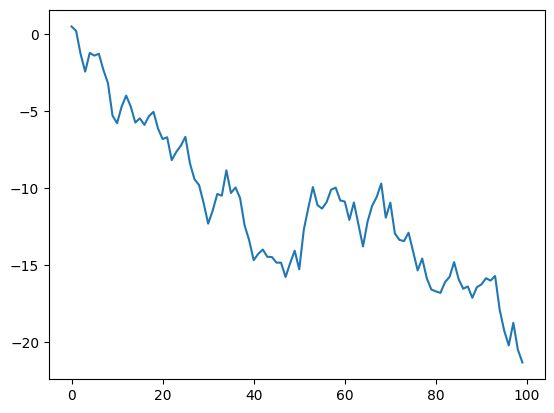

In [53]:
# Посмотрим на первые 100 значений
s[:100].plot()

Чтобы создать скользящее окно нам потрнебуется обьект rolling, который мы
получаем с помощью метода <mark> .rolling()</mark>, указав ширину окна. 

Объект Rolling задает ширину окна, но при этом **он не выполняет фактических
вычислений**. Чтобы выполнить их, можно выбрать один из многочисленных методов объекта Rolling, выполняющий определенную статистическую операцию


In [54]:
# вычислим скользящее окно шириной 3 дня
rol = s.rolling(window = 3)

# вычислим скользящее среденее по трем дням
mean = rol.mean()
mean[:7]

0         NaN
1         NaN
2   -0.222483
3   -1.198334
4   -1.675860
5   -1.708105
6   -1.322070
dtype: float64

#### Создание случайной величины
**Случайная выборка** – это процесс случайного отбора значений из набора данных.

In [55]:
# создаем датафрейм, состоящий из 50 строк и 4 столбцов случайных чисел 
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(50, 4))
df[:5]

          0         1         2         3
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

Мы можем отобрать данные (т. е. создать выборку данных) с помощью метода
<mark>.sample()</mark>, указав количество извлекаемых наблюдений.

In [56]:
# отбираем 3 случайных строки
df.sample(n=3)

           0         1         2         3
15 -0.076467 -1.187678  1.130127 -1.436737
28 -2.182937  0.380396  0.084844  0.432390
48 -0.693921  1.613616  0.464000  0.227371

In [57]:
# можно указать процент случайно отбираемых данных
# отбираем 10% строк
df.sample(frac=0.1)

           0         1         2         3
37  1.126203 -0.977349  1.474071 -0.064034
10 -1.294524  0.413738  0.276662 -0.472035
4  -0.424972  0.567020  0.276232 -1.087401
14  0.410835  0.813850  0.132003 -0.827317
48 -0.693921  1.613616  0.464000  0.227371

В библиотеке pandas **можно выполнить случайный отбор с возвращением или
без возвращения**, при этом по умолчанию используется отбор без возвращения.

Чтобы задать случайный **отбор с возвращением**, просто воспользуемся параметром **replace=True**:


In [58]:
# случайный отбор 10 % наблюдений с возвращением
df.sample(frac=0.1, replace=True)

           0         1         2         3
27 -1.236269  0.896171 -0.487602 -0.082240
9   0.357021 -0.674600 -1.776904 -0.968914
27 -1.236269  0.896171 -0.487602 -0.082240
15 -0.076467 -1.187678  1.130127 -1.436737
9   0.357021 -0.674600 -1.776904 -0.968914